###Heading

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [64]:
dir = '/content/gdrive/MyDrive/Digit'

###Data Creating

In [ ]:
digits = pd.read_csv(f"{dir}/train.csv")

In [ ]:
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_set, test_set = train_test_split(digits, test_size=0.0001, random_state=21)

In [ ]:
train_set.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
37598,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17849,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6449,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6834,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39504,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(len(test_set), len(train_set))

5 41995


###Data Modifying

In [ ]:
data = train_set.copy()

In [ ]:
def Splitting(data, label):
    data_x = data.drop(label, axis=1)
    data_y = pd.DataFrame(data[label])
    return data_x, data_y

In [ ]:
x_train, y_train = Splitting(data, 'label')

In [ ]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
37598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17849,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train

,label
37598,9
17849,6
6449,6
6834,4
39504,9
...,...
16432,6
8964,0
5944,7
5327,8


In [ ]:
# x_train = x_train.to_numpy()
# y_train = y_train.to_numpy()

In [ ]:
# x_train.shape

In [ ]:
# y_train.shape

In [ ]:
def Modify(x_data, y_data):
  x_data = x_data.to_numpy()
  y_data = y_data.to_numpy()
  y_data = y_data.reshape((y_data.shape[0]))
  x_data = x_data.reshape((x_data.shape[0], 28, 28))
  return x_data, y_data

In [ ]:
x_train, y_train = Modify(x_train, y_train)

In [ ]:
y_train.shape

(41995,)

In [ ]:
x_train.shape

(41995, 28, 28)

###Visualize

In [ ]:
import matplotlib.pyplot as plt

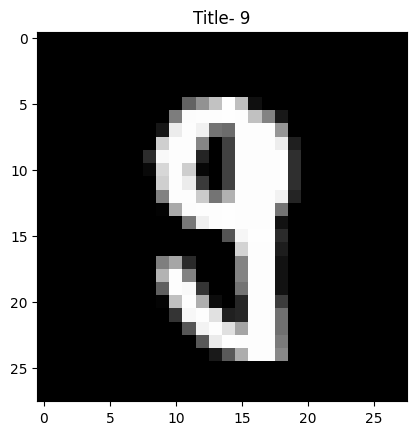

In [ ]:
plt.imshow(x_train[14], cmap='gray')
plt.title(f'Title- {y_train[14]}')
plt.show()

###For Model

In [ ]:
import tensorflow as tf

In [ ]:
def Normalize(x_data):
  x_data = tf.keras.utils.normalize(x_data, axis=1)
  return x_data

In [ ]:
x_train = Normalize(x_train)

###Model

In [66]:
layer_1 = tf.keras.layers.Dense(units=512, activation='relu')
layer_2 = tf.keras.layers.Dense(units=256, activation='relu')
layer_3= tf.keras.layers.Dense(units=196, activation='relu')
layer_4 = tf.keras.layers.Dense(units=196, activation='relu')
layer_5 = tf.keras.layers.Dense(units=196, activation='relu')
layer_6 = tf.keras.layers.Dense(units=10, activation='softmax')

In [67]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)
model.add(layer_5)
model.add(layer_6)

In [68]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 512)               401920    
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 196)               50372     
                                                                 
 dense_18 (Dense)            (None, 196)               38612     
                                                                 
 dense_19 (Dense)            (None, 196)               38612     
                                                                 
 dense_20 (Dense)            (None, 10)               

In [69]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [70]:
epochs = 30

###Run

In [71]:
model.fit(x_train, y_train, epochs=epochs)

Epoch 1/30
1313/1313 [==============================] - 16s 12ms/step - loss: 0.2659 - accuracy: 0.9186
Epoch 2/30
1313/1313 [==============================] - 15s 12ms/step - loss: 0.1173 - accuracy: 0.9662
Epoch 3/30
1313/1313 [==============================] - 17s 13ms/step - loss: 0.0833 - accuracy: 0.9758
Epoch 4/30
1313/1313 [==============================] - 15s 12ms/step - loss: 0.0618 - accuracy: 0.9816
Epoch 5/30
1313/1313 [==============================] - 15s 12ms/step - loss: 0.0507 - accuracy: 0.9850
Epoch 6/30
1313/1313 [==============================] - 15s 12ms/step - loss: 0.0423 - accuracy: 0.9877
Epoch 7/30
1313/1313 [==============================] - 15s 11ms/step - loss: 0.0360 - accuracy: 0.9895
Epoch 8/30
1313/1313 [==============================] - 15s 11ms/step - loss: 0.0300 - accuracy: 0.9910
Epoch 9/30
1313/1313 [==============================] - 15s 12ms/step - loss: 0.0300 - accuracy: 0.9912
Epoch 10/30
1313/1313 [==============================] - 16s 12m

In [72]:
def Prepare(data):
  x_data, y_data = Splitting(data, 'label')
  x_data, y_data = Modify(x_data, y_data)
  x_data = Normalize(x_data)
  return x_data, y_data

###Test

In [73]:
x_test, y_test = Prepare(test_set)

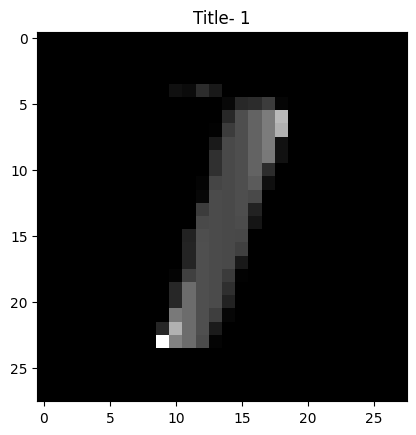

In [74]:
plt.imshow(x_test[0], cmap='gray')
plt.title(f'Title- {y_test[0]}')
plt.show()

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 84ms/step


In [77]:
y_test

array([1, 4, 2, 3, 8])

In [78]:
y_pred = [np.argmax(each) for each in y_pred]

In [79]:
y_pred = np.array(y_pred)

In [80]:
y_pred

array([1, 4, 9, 3, 8])

In [81]:
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.8


###Final Test

In [82]:
test_data_final = pd.read_csv(f"{dir}/test.csv")

In [83]:
test_data_final.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
def Prepare2(data):
  x_data = data.to_numpy()
  x_data = x_data.reshape((x_data.shape[0], 28, 28))
  x_data = Normalize(x_data)
  return x_data

In [85]:
final_x = Prepare2(test_data_final)

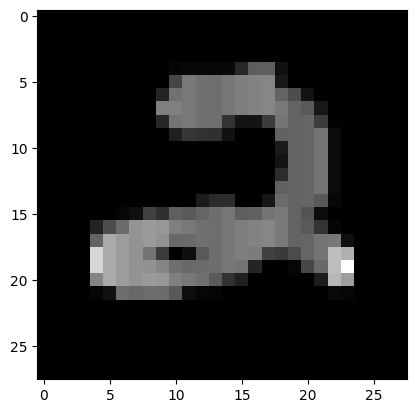

In [86]:
plt.imshow(final_x[0], cmap='gray')
plt.show()

In [87]:
final_pred = model.predict(final_x)

875/875 [==============================] - 3s 3ms/step


In [88]:
final_pred = [np.argmax(each) for each in final_pred]
final_pred = np.array(final_pred)

In [89]:
final_pred

array([2, 0, 9, ..., 3, 9, 2])

###Submission

In [90]:
submission = pd.read_csv(f"{dir}/sample_submission.csv")

In [91]:
for i in range(len(submission)):
  submission.loc[i, 'Label'] = final_pred[i]

In [92]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [93]:
submission.to_csv(f'{dir}/subm3.csv', index=False)

###Visualize

In [ ]:
for i in range(len(submission)):
  plt.imshow(final_x[i], cmap='gray')
  plt.title(f'Title- {final_pred[i]}')
  plt.show()

###CNN

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same',
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same',
                       activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))


model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same',
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same',
                       activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256,activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))